In [1]:
import torch
from torch_geometric.data import Data
# draw the graph
import networkx as nx
import matplotlib.pyplot as plt
# summary
from torchinfo import summary
# graphnet
from graphnet.models.gnn import ConvNet

/home/xt/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


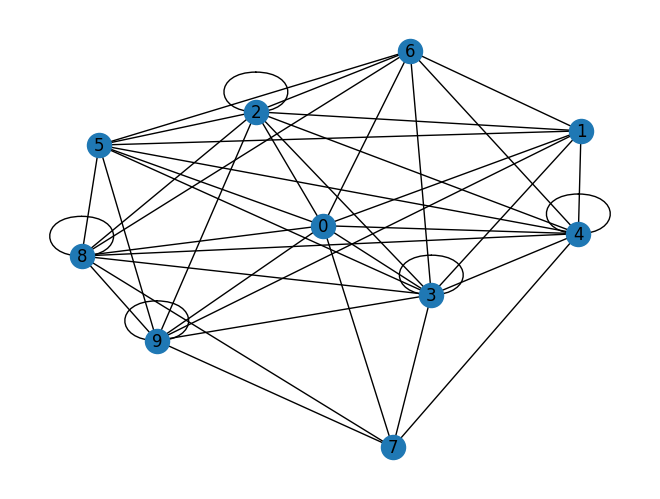

In [2]:
# 10 nodes, each node has 5 features
x = torch.rand((10, 5))
# randomly generate 100 edges in this graph
# the number of edges can be any number >=0 and <=10!
edge_index = torch.randint(low=0, high=10, size=(2, 100), dtype=torch.long)
# batch
batch = torch.tensor([0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=torch.long)
# put the data together by torch_geometric.data.Data
data = Data(x=x, edge_index=edge_index, batch=batch)

# draw the graph
def visualize(data):
    G = nx.Graph()
    G.add_nodes_from(range(data.x.size(0)))
    G.add_edges_from(data.edge_index.t().tolist())
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True)
    plt.show()

visualize(data)

In [3]:
model = ConvNet(nb_inputs=5, nb_outputs=3, nb_intermediate=128, dropout_ratio=0.3)
summary(model)

graphnet [MainProcess] INFO     2023-09-03 13:41:31 - ConvNet.__init__ - Writing log to logs/graphnet_20230903-134131.log


Layer (type:depth-idx)                   Param #
ConvNet                                  --
├─TAGConv: 1-1                           128
│    └─SumAggregation: 2-1               --
│    └─ModuleList: 2-2                   --
│    │    └─Linear: 3-1                  640
│    │    └─Linear: 3-2                  640
│    │    └─Linear: 3-3                  640
├─TAGConv: 1-2                           128
│    └─SumAggregation: 2-3               --
│    └─ModuleList: 2-4                   --
│    │    └─Linear: 3-4                  16,384
│    │    └─Linear: 3-5                  16,384
│    │    └─Linear: 3-6                  16,384
├─TAGConv: 1-3                           128
│    └─SumAggregation: 2-5               --
│    └─ModuleList: 2-6                   --
│    │    └─Linear: 3-7                  16,384
│    │    └─Linear: 3-8                  16,384
│    │    └─Linear: 3-9                  16,384
├─BatchNorm1d: 1-4                       1,536
├─Linear: 1-5                         

In [4]:
output = model(data)
print(output)
print(output.shape)# [number_of_batches, nb_outputs]

tensor([[-0.0210, -0.0035,  0.0277],
        [-0.0048,  0.0220,  0.0380]], grad_fn=<AddmmBackward0>)
torch.Size([2, 3])
